In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
customers = pd.read_csv('/content/Customers.csv')
products = pd.read_csv('/content/Products.csv')
transactions = pd.read_csv('/content/Transactions.csv')

In [4]:
# Convert date columns to datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [5]:
# Check for null values
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [7]:
# Summary statistics
print(customers.describe(include='all'))

       CustomerID      CustomerName         Region           SignupDate
count         200               200            200                  200
unique        200               200              4                  NaN
top         C0001  Lawrence Carroll  South America                  NaN
freq            1                 1             59                  NaN
mean          NaN               NaN            NaN  2023-07-19 08:31:12
min           NaN               NaN            NaN  2022-01-22 00:00:00
25%           NaN               NaN            NaN  2022-09-26 12:00:00
50%           NaN               NaN            NaN  2023-08-31 12:00:00
75%           NaN               NaN            NaN  2024-04-12 12:00:00
max           NaN               NaN            NaN  2024-12-28 00:00:00


In [9]:
# Summary statistics
print(products.describe())

            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000


In [10]:
#Summary-transactions
print(transactions.describe())

                     TransactionDate     Quantity   TotalValue       Price
count                           1000  1000.000000  1000.000000  1000.00000
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000
25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000
50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000
75%              2024-09-19 14:19:57     4.000000  1011.660000   404.40000
max              2024-12-28 11:00:00     4.000000  1991.040000   497.76000
std                              NaN     1.117981   493.144478   140.73639


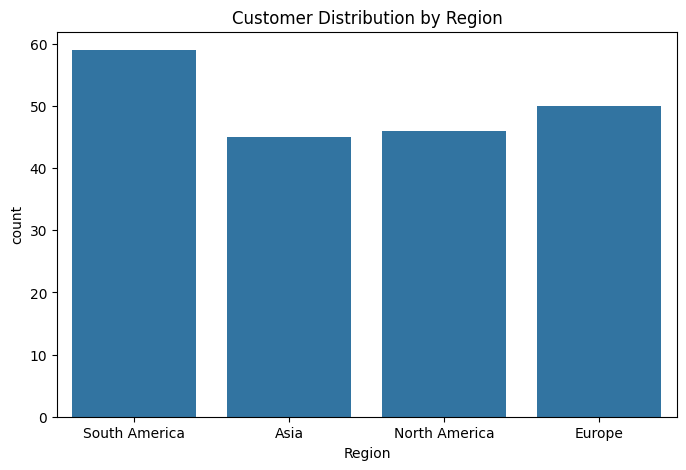

In [11]:
# Univariate analysis
plt.figure(figsize=(8, 5))
sns.countplot(data=customers, x='Region')
plt.title('Customer Distribution by Region')
plt.show()

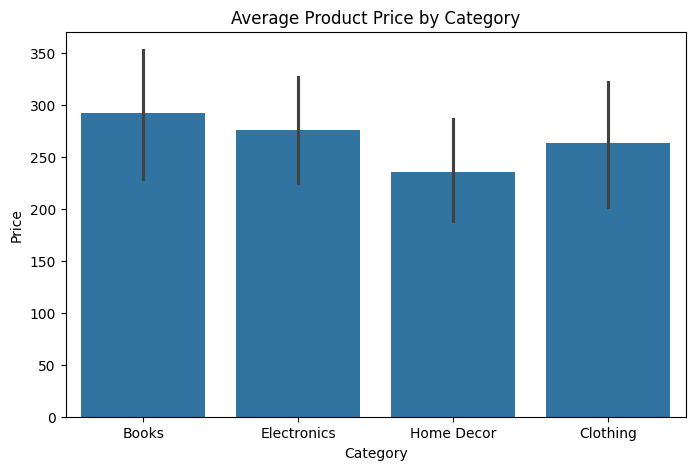

In [12]:
plt.figure(figsize=(8, 5))
sns.barplot(data=products, x='Category', y='Price', estimator=np.mean)
plt.title('Average Product Price by Category')
plt.show()

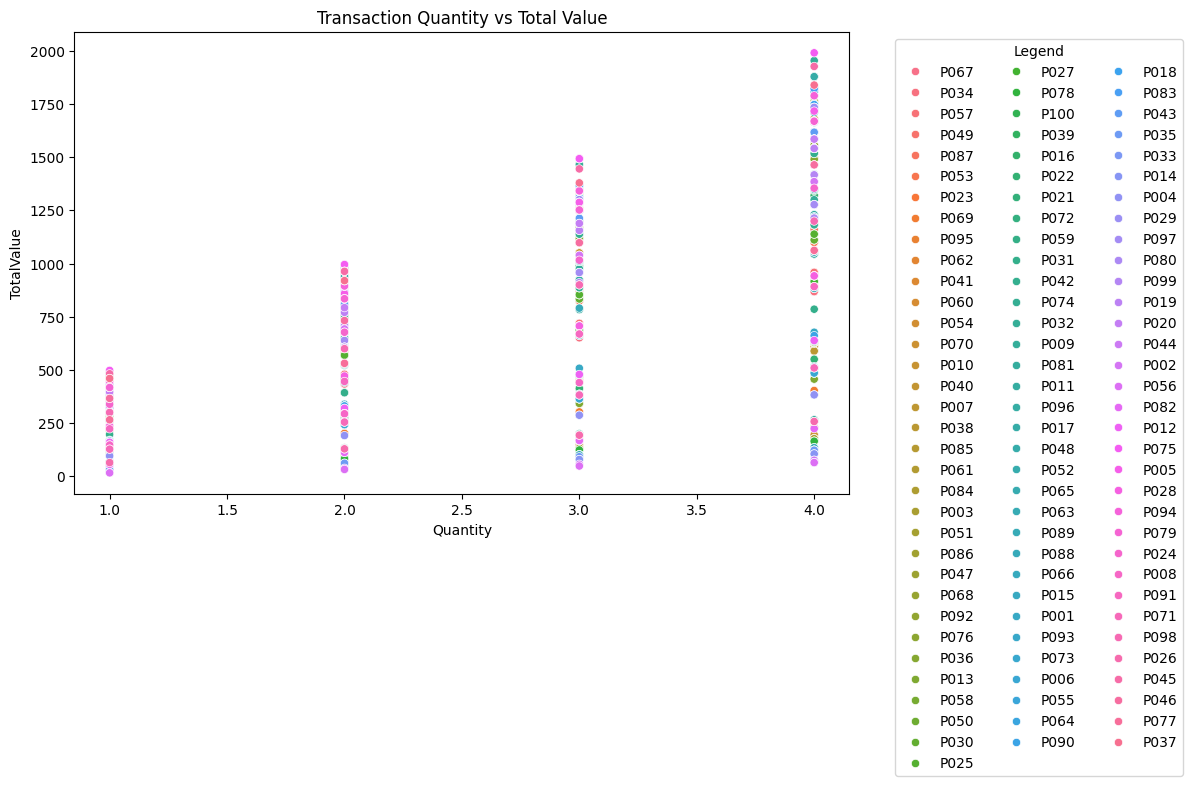

In [18]:
# Bivariate analysis
plt.figure(figsize=(10, 6))
sns.scatterplot(data=transactions, x='Quantity', y='TotalValue', hue='ProductID')
plt.title('Transaction Quantity vs Total Value')
plt.legend(title="Legend",bbox_to_anchor=(1.05, 1),loc="upper left",ncol=3)
plt.show()

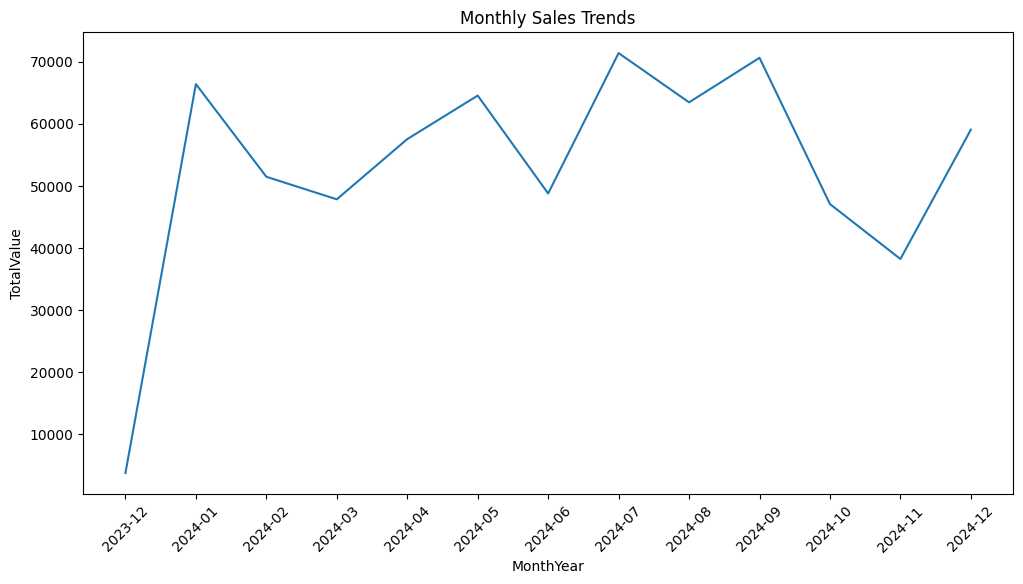

In [14]:
# Time-based analysis
transactions['MonthYear'] = transactions['TransactionDate'].dt.to_period('M')
monthly_sales = transactions.groupby('MonthYear')['TotalValue'].sum().reset_index()
monthly_sales['MonthYear'] = monthly_sales['MonthYear'].astype(str)

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='MonthYear', y='TotalValue')
plt.xticks(rotation=45)
plt.title('Monthly Sales Trends')
plt.show()


In [15]:
# Merge datasets
merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

# Additional insights
top_products = merged_data.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head(5)
print("Top 5 Products by Revenue:\n", top_products)

top_regions = merged_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
print("Revenue by Region:\n", top_regions)

# Save EDA findings
merged_data.to_csv('Merged_Dataset.csv', index=False)

Top 5 Products by Revenue:
 ProductName
ActiveWear Smartwatch    39096.97
SoundWave Headphones     25211.64
SoundWave Novel          24507.90
ActiveWear Jacket        22712.56
ActiveWear Rug           22314.43
Name: TotalValue, dtype: float64
Revenue by Region:
 Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


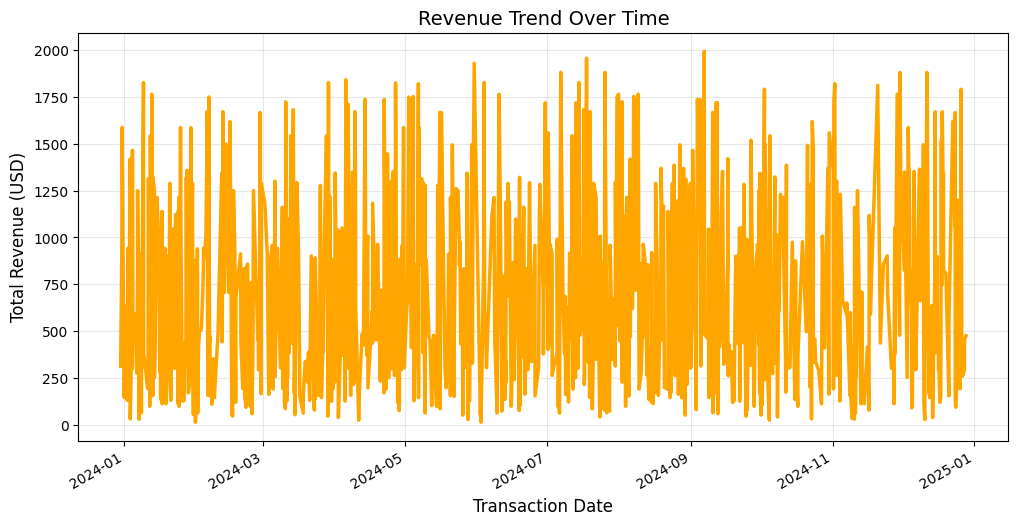

In [20]:
# Grouping by TransactionDate and summing TotalValue
revenue_trend = transactions.groupby('TransactionDate')['TotalValue'].sum()

plt.figure(figsize=(12, 6))
revenue_trend.plot(color='orange', linewidth=2.5)
plt.title('Revenue Trend Over Time', fontsize=14)
plt.xlabel('Transaction Date', fontsize=12)
plt.ylabel('Total Revenue (USD)', fontsize=12)
plt.grid(alpha=0.3)
plt.show()


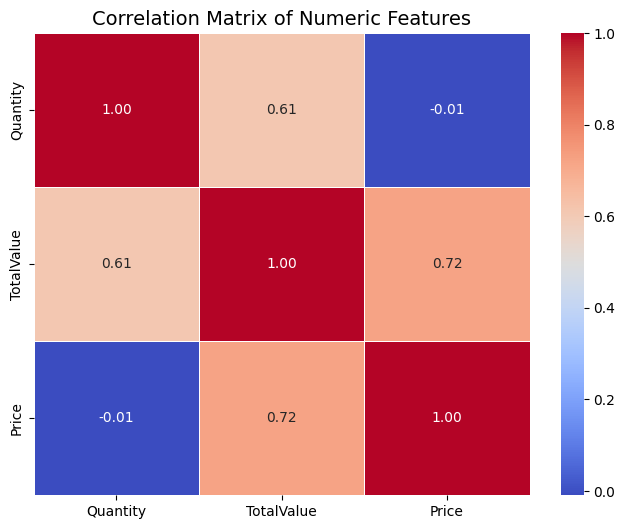

In [21]:
# Compute the correlation matrix
correlation_matrix = transactions[['Quantity', 'TotalValue', 'Price']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features', fontsize=14)
plt.show()


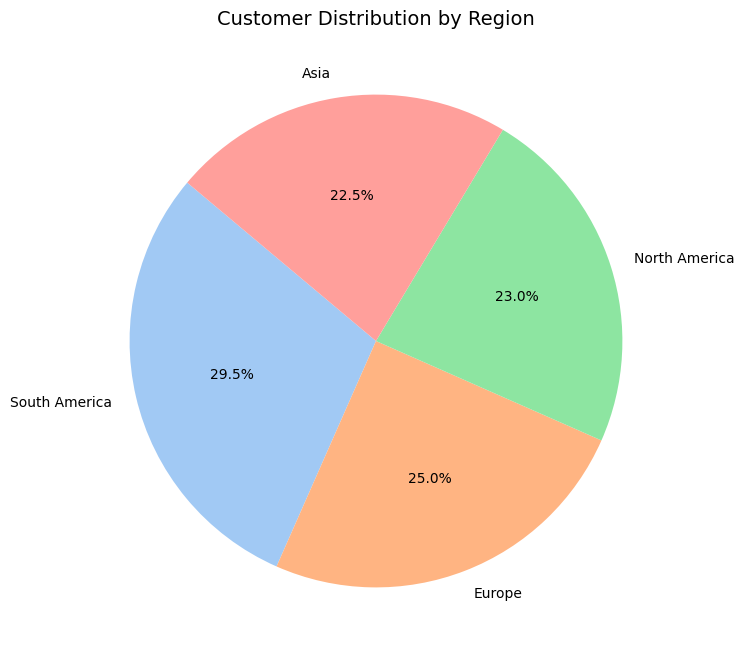

In [22]:
# Grouping by Region
region_distribution = customers['Region'].value_counts()

plt.figure(figsize=(8, 8))
region_distribution.plot.pie(autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Customer Distribution by Region', fontsize=14)
plt.ylabel('')
plt.show()
